## Loading The Dataset

In [1]:
import pandas as pd
df=pd.read_csv("E:\\R.P 2\\Data-Credit Card Transactions Fraud Detection 2019–2020\\cleaned_data.csv")
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,zip,lat,...,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,weekday,time_gap,age
0,2019-01-01 12:47:00,6.041621e+10,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,F,Fort Washakie,WY,82514,43.0048,...,1325422035,43.974711,-109.741904,0,12,1,1,1,0.0,33
1,2019-01-02 08:44:00,6.041621e+10,fraud_Berge LLC,gas_transport,52.94,F,Fort Washakie,WY,82514,43.0048,...,1325493897,42.018766,-109.044172,0,8,2,1,2,1197.0,33
2,2019-01-02 08:47:00,6.041621e+10,fraud_Luettgen PLC,gas_transport,82.08,F,Fort Washakie,WY,82514,43.0048,...,1325494056,42.961335,-109.157564,0,8,2,1,2,3.0,33
3,2019-01-02 12:38:00,6.041621e+10,fraud_Daugherty LLC,kids_pets,34.79,F,Fort Washakie,WY,82514,43.0048,...,1325507894,42.228227,-108.747683,0,12,2,1,2,231.0,33
4,2019-01-02 13:10:00,6.041621e+10,fraud_Beier and Sons,home,27.18,F,Fort Washakie,WY,82514,43.0048,...,1325509846,43.321745,-108.091143,0,13,2,1,2,32.0,33


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1048575 non-null  object 
 1   cc_num                 1048575 non-null  float64
 2   merchant               1048575 non-null  object 
 3   category               1048575 non-null  object 
 4   amt                    1048575 non-null  float64
 5   gender                 1048575 non-null  object 
 6   city                   1048575 non-null  object 
 7   state                  1048575 non-null  object 
 8   zip                    1048575 non-null  int64  
 9   lat                    1048575 non-null  float64
 10  long                   1048575 non-null  float64
 11  city_pop               1048575 non-null  int64  
 12  job                    1048575 non-null  object 
 13  dob                    1048575 non-null  object 
 14  unix_time         

In [2]:
df.shape

(1048575, 24)

In [3]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,weekday,time_gap,age
0,6.041621e+10,7.27,82514,43.0048,-108.8964,1645,1325422035,43.974711,-109.741904,0,12,1,1,1,0.0,33
1,6.041621e+10,52.94,82514,43.0048,-108.8964,1645,1325493897,42.018766,-109.044172,0,8,2,1,2,1197.0,33
2,6.041621e+10,82.08,82514,43.0048,-108.8964,1645,1325494056,42.961335,-109.157564,0,8,2,1,2,3.0,33
3,6.041621e+10,34.79,82514,43.0048,-108.8964,1645,1325507894,42.228227,-108.747683,0,12,2,1,2,231.0,33
4,6.041621e+10,27.18,82514,43.0048,-108.8964,1645,1325509846,43.321745,-108.091143,0,13,2,1,2,32.0,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,4.990000e+18,120.04,29127,34.1832,-81.5324,8333,1362874452,35.137752,-81.227740,0,0,10,3,1,322.0,26
1048571,4.990000e+18,17.52,61335,41.1730,-89.2187,532,1362876979,40.445215,-88.425448,0,0,10,3,1,42.0,64
1048572,4.990000e+18,3.54,61335,41.1730,-89.2187,532,1362883539,41.562968,-88.428600,0,2,10,3,1,109.0,64
1048573,4.990000e+18,172.50,29127,34.1832,-81.5324,8333,1362895897,34.218730,-80.683947,0,6,10,3,1,206.0,26


In [4]:
num_cols.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,weekday,time_gap,age
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,4.171800e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1.344906e+09,3.853346e+01,-9.022648e+01,5.727773e-03,1.280077e+01,1.553017e+01,6.514797e+00,3.135594e+00,1.871335e+02,4.588899e+01
std,1.308893e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,1.019700e+07,5.111233e+00,1.377093e+01,7.546503e-02,6.816861e+00,8.902089e+00,3.668344e+00,2.200499e+00,4.208611e+02,1.736625e+01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.400000e+01
25%,1.800000e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.336682e+09,3.472954e+01,-9.689864e+01,0.000000e+00,7.000000e+00,8.000000e+00,3.000000e+00,1.000000e+00,1.500000e+01,3.200000e+01
50%,3.520000e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.344902e+09,3.936295e+01,-8.743923e+01,0.000000e+00,1.400000e+01,1.500000e+01,7.000000e+00,3.000000e+00,5.200000e+01,4.400000e+01
75%,4.640000e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.354366e+09,4.195602e+01,-8.023228e+01,0.000000e+00,1.900000e+01,2.300000e+01,1.000000e+01,5.000000e+00,1.760000e+02,5.700000e+01
max,4.990000e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.362932e+09,6.751027e+01,-6.695090e+01,1.000000e+00,2.300000e+01,3.100000e+01,1.200000e+01,6.000000e+00,2.009500e+04,9.600000e+01


# E   D  A

## Target Distribution (1)

In [9]:
#Count of Fraud and Non-Fraud 
df['is_fraud'].value_counts()

is_fraud
0    1042569
1       6006
Name: count, dtype: int64

In [10]:
df['is_fraud'].value_counts(normalize=True) * 100

is_fraud
0    99.427223
1     0.572777
Name: proportion, dtype: float64

- ### Insights:Fraudulent transactions constitute a very small proportion of total transactions. Class Imbalance is confirmed.

## Transaction Amount – Fraud vs Non-Fraud (1)

In [11]:
df.groupby('is_fraud')['amt'].describe()


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1042569.0,67.627445,153.695606,1.00,9.6000,47.220,82.47,28948.90
1,6006.0,530.573492,391.333069,1.18,241.5775,391.165,901.95,1371.81


- ### insights:Fraudulent transactions generally involve much higher transaction amounts compared to genuine transactions. While most genuine transactions are of low value, fraudulent transactions tend to occur in a higher amount range.

## Time Gap Analysis (2) 

In [12]:
df.groupby('is_fraud')['time_gap'].describe()


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1042569.0,187.480501,421.411011,0.0,15.0,52.0,176.0,20095.0
1,6006.0,126.903430,305.115645,0.0,10.0,29.0,86.0,8388.0


- ### Fraudulent transactions tend to occur within shorter time intervals compared to genuine transactions. This indicates that fraud often happens as a quick sequence of multiple transactions.

## To test whether the time gap between transactions differs for fraudulent and genuine transactions (2)

In [13]:
from scipy.stats import mannwhitneyu

fraud_gap = df[df['is_fraud'] == 1]['time_gap']
nonfraud_gap = df[df['is_fraud'] == 0]['time_gap']

stat, p = mannwhitneyu(fraud_gap, nonfraud_gap, alternative='two-sided')

print("Mann-Whitney U Statistic:", stat)
print("p-value:", p)


Mann-Whitney U Statistic: 2597440318.0
p-value: 4.172204050961408e-115


### Since the p-value < level of significance (0.05),
- we reject the null hypothesis and conclude that there is a statistically significant difference in the time gap between fraudulent and genuine transactions.
- This indicates that fraudulent transactions tend to occur with different transaction timing patterns compared to normal transactions. In particular, fraud transactions are more likely to happen with shorter time gaps, suggesting rapid or suspicious transaction behaviour.
- Therefore, time gap between transactions is an important indicator for identifying potential credit card fraud.


## Hour-wise Fraud Pattern (2)

In [14]:
df.groupby('hour')['is_fraud'].mean() 


hour
0     0.015198
1     0.015450
2     0.014648
3     0.014093
4     0.001178
5     0.001407
6     0.000845
7     0.001259
8     0.001343
9     0.001147
10    0.000905
11    0.000851
12    0.001063
13    0.001227
14    0.001427
15    0.001208
16    0.001243
17    0.001192
18    0.001049
19    0.001092
20    0.000950
21    0.001117
22    0.028224
23    0.027933
Name: is_fraud, dtype: float64

- ### Fraudulent transactions are more likely to occur during late night hours, especially between 10 PM and 12 AM, while daytime transactions show significantly lower fraud rates.

## Day-wise / Weekday Pattern (2) 

In [15]:
df.groupby('weekday')['is_fraud'].mean()
  

weekday
0    0.004716
1    0.006084
2    0.006135
3    0.006328
4    0.007098
5    0.006184
6    0.004801
Name: is_fraud, dtype: float64

- ### Fraudulent transactions are more frequent towards the end of the week, especially on Fridays, while the beginning and end of the week show lower fraud occurrence.

## Category-wise Fraud (3)

In [16]:
category_fraud_count = (
    df[df['is_fraud'] == 1]
    .groupby('category')
    .size()
    .sort_values(ascending=False))

print(category_fraud_count)


category
grocery_pos       1396
shopping_net      1375
misc_net           742
shopping_pos       662
gas_transport      498
kids_pets          194
misc_pos           194
entertainment      185
personal_care      172
home               153
food_dining        121
grocery_net        110
health_fitness     104
travel             100
dtype: int64


In [17]:
#proportion 
df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)


category
shopping_net      0.017427
misc_net          0.014526
grocery_pos       0.013973
shopping_pos      0.007016
gas_transport     0.004679
travel            0.003046
misc_pos          0.003008
grocery_net       0.002996
entertainment     0.002435
personal_care     0.002340
kids_pets         0.002122
food_dining       0.001634
home              0.001536
health_fitness    0.001499
Name: is_fraud, dtype: float64

- ### Fraudulent transactions are significantly more common in online shopping categories compared to point-of-sale transactions, indicating higher risk in card-not-present environments.

In [18]:
import numpy as np

## Distance calculate Function 

In [19]:
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in KM
    
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    return R * c


## distance_km column  

In [20]:
df['distance_km'] = haversine(
    df['lat'],
    df['long'],
    df['merch_lat'],
    df['merch_long']
)


In [21]:
df["distance_km"].head()


0    127.606239
1    110.308921
2     21.787261
3     87.204215
4     74.212965
Name: distance_km, dtype: float64

## Distance vs Fraud

In [22]:
df.groupby('is_fraud')['distance_km'].describe()


,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,1042569.0,76.101398,29.114996,0.022255,55.330371,78.212461,98.480836,152.117173
1,6006.0,76.237524,28.698942,0.738769,55.623008,77.869499,98.372391,144.522410


- ###  The average distance for fraudulent and non-fraudulent transactions is almost the same, suggesting that transaction distance alone is not a strong indicator of fraud.

## Correlation Check

In [23]:
df[['amt','time_gap','distance_km','is_fraud']].corr()
 

,amt,time_gap,distance_km,is_fraud
amt,1.000000,-0.003498,-0.001679,0.218417
time_gap,-0.003498,1.000000,0.001569,-0.010862
distance_km,-0.001679,0.001569,1.000000,0.000353
is_fraud,0.218417,-0.010862,0.000353,1.000000


- ### Transaction amount shows a moderate positive correlation with fraud, indicating higher amounts are more likely to be fraudulent. Time gap and transaction distance have negligible correlation with fraud, suggesting they are not strong indicators on their own.

# 📊 EDA – Graphs

## Fraud vs Non-Fraud Count (Class Imbalance) (1)

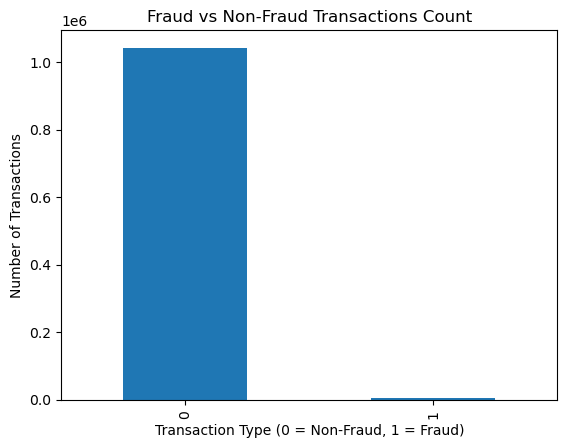

In [14]:
import matplotlib.pyplot as plt

df['is_fraud'].value_counts().plot(kind='bar')
plt.title('Fraud vs Non-Fraud Transactions Count')
plt.xlabel('Transaction Type (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Number of Transactions')
plt.show()


- ### The dataset is highly imbalanced, with fraudulent transactions forming a very small proportion of total transactions.

## Transaction Amount Distribution (1)
### (a) Histogram

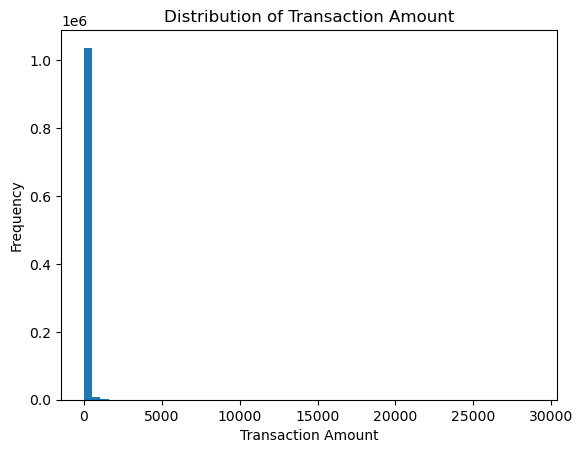

In [15]:
df['amt'].plot(kind='hist', bins=55)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

## Amount vs Fraud (Boxplot)(1)


<Figure size 700x500 with 0 Axes>

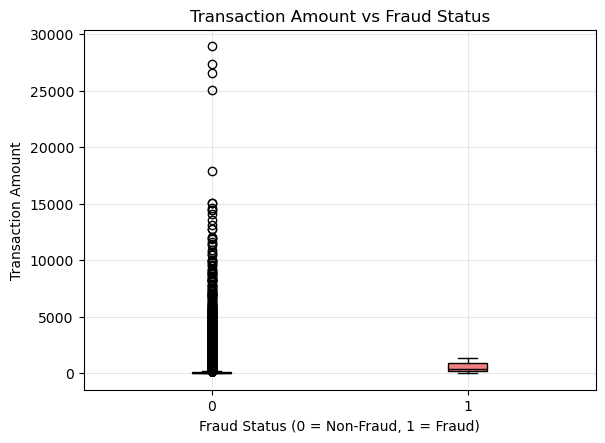

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
df.boxplot(
    column='amt',
    by='is_fraud',
    patch_artist=True,
    boxprops=dict(facecolor='lightcoral'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)
plt.title('Transaction Amount vs Fraud Status')
plt.suptitle('')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.grid(alpha=0.3)
plt.show()


- ### Fraudulent transactions tend to involve higher amounts compared to legitimate ones. While most non-fraud transactions are low in value, fraud cases include several high-amount outliers. This means transaction amount is a useful indicator for spotting potential fraud.



## Time Gap vs Fraud (2)


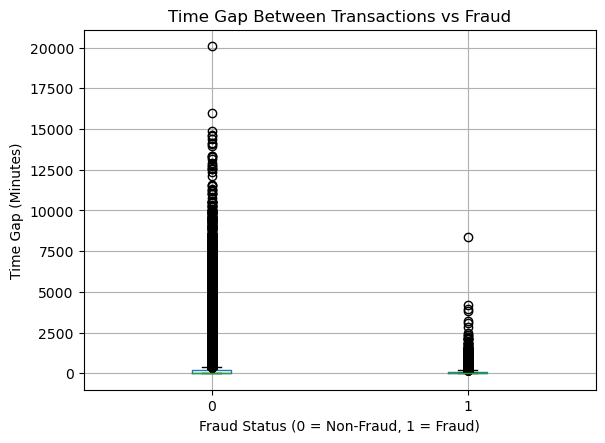

In [24]:
df.boxplot(column='time_gap', by='is_fraud')
plt.title('Time Gap Between Transactions vs Fraud')
plt.suptitle('')
plt.xlabel('Fraud Status (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Time Gap (Minutes)')
plt.show()

- ### Fraudulent transactions often occur with shorter time gaps between them compared to legitimate ones. This suggests fraudsters may act quickly in succession, while normal transactions are more spread out. Time between transactions could help flag suspicious activity.

## Hour-wise Fraud Pattern (2)

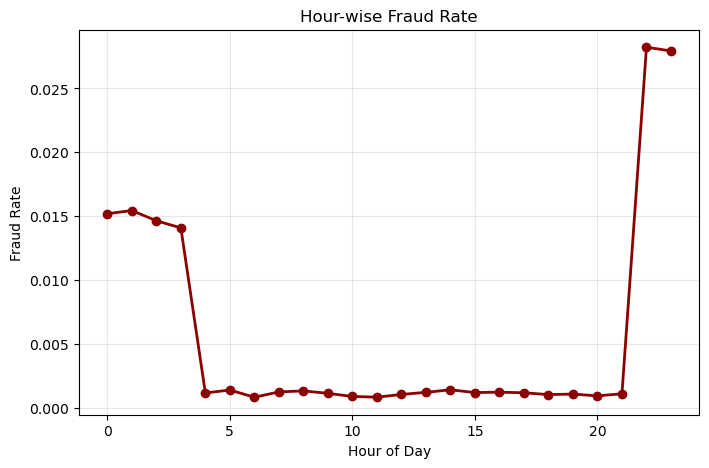

In [26]:
plt.figure(figsize=(8,5))
df.groupby('hour')['is_fraud'].mean().plot(
    kind='line',
    marker='o',
    color='darkred',     # 🔴 color added
    linewidth=2
)
plt.title('Hour-wise Fraud Rate')
plt.xlabel('Hour of Day')
plt.ylabel('Fraud Rate')
plt.grid(alpha=0.3)
plt.show()

- ### Fraud happens more during certain hours, especially late at night and early morning, with lower rates during daytime and evening hours. This pattern suggests fraudulent activity peaks when monitoring may be lower or less expected.

## Weekday-wise Fraud Pattern (2)

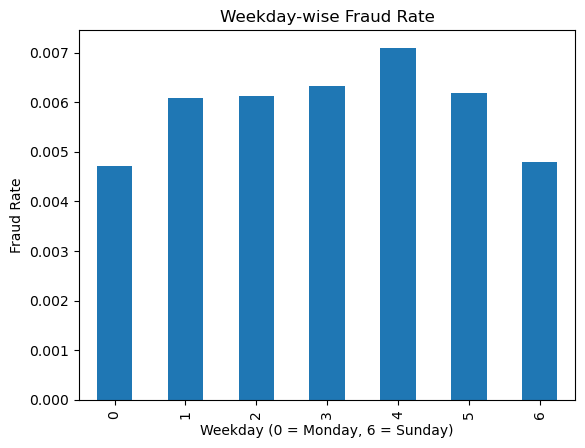

In [19]:
df.groupby('weekday')['is_fraud'].mean().plot(kind='bar')
plt.title('Weekday-wise Fraud Rate')
plt.xlabel('Weekday (0 = Monday, 6 = Sunday)')
plt.ylabel('Fraud Rate')
plt.show()


- ### Fraud occurs slightly more often on weekends, especially Sunday, compared to weekdays. Weekday fraud is lower and more stable. This suggests fraudsters may take advantage of lower banking activity on weekends.



## Category-wise Fraud Rate (3)

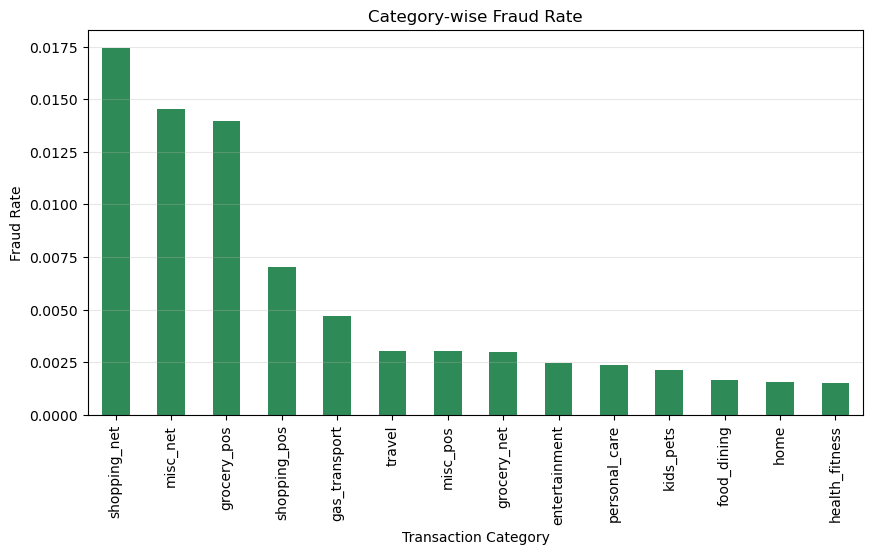

In [27]:
plt.figure(figsize=(10,5))
df.groupby('category')['is_fraud'].mean().sort_values(ascending=False).plot(
    kind='bar',
    color='seagreen'     # 🟢 color added
)
plt.title('Category-wise Fraud Rate')
plt.xlabel('Transaction Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.3)
plt.show()


In [21]:
fraud_rate = df.groupby('category')['is_fraud'].mean()

high_risk = fraud_rate.sort_values(ascending=False).head(5)
low_risk  = fraud_rate.sort_values().head(5)

print("high risk:", high_risk)
print("low risk:", low_risk)


high risk: category
shopping_net     0.017427
misc_net         0.014526
grocery_pos      0.013973
shopping_pos     0.007016
gas_transport    0.004679
Name: is_fraud, dtype: float64
low risk: category
health_fitness    0.001499
home              0.001536
food_dining       0.001634
kids_pets         0.002122
personal_care     0.002340
Name: is_fraud, dtype: float64


- ### Some shopping and online purchase categories have a higher fraud rate than others. Online shopping and miscellaneous net purchases are riskier, while in-person grocery and gas transactions are safer. This helps focus fraud checks on high-risk categories.

## Correlation Heatmap 

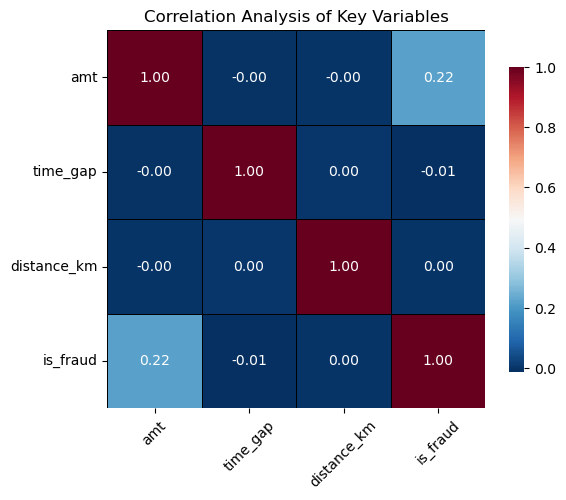

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))

corr = df[['amt','time_gap','distance_km','is_fraud']].corr()

sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    linewidths=0.5,
    linecolor="black",
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Analysis of Key Variables", fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- ### The correlation matrix shows that is_fraud has a weak negative link with time_gap and distance_km, meaning fraud is slightly more likely when less time passes between transactions and when the distance is shorter. However, none of the variables are strongly correlated with fraud on their own.

## Noramality Check for time_gap variable 

In [7]:
from scipy.stats import shapiro

# Take random samples (Shapiro is not suitable for very large data)
fraud_sample = df[df['is_fraud'] == 1]['time_gap'].sample(5000, random_state=42)
nonfraud_sample = df[df['is_fraud'] == 0]['time_gap'].sample(5000, random_state=42)

# Shapiro-Wilk Test
stat_fraud, p_fraud = shapiro(fraud_sample)
stat_nonfraud, p_nonfraud = shapiro(nonfraud_sample)

print("Fraud Time Gap p-value:", p_fraud)
print("Non-Fraud Time Gap p-value:", p_nonfraud)


Fraud Time Gap p-value: 7.534054174248599e-84
Non-Fraud Time Gap p-value: 3.9808530691501024e-84


### Since the p-value < level of significance (0.05), 
- time_gap data is Non Normal 